***Import dependencies***

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [40]:
!pip install --upgrade xgboost scikit-learn

***Importing the Boston House Price Dataset***

In [4]:
house_price_dataset = pd.read_csv("BostonHousing.csv")
house_price_dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


***📊 Exploratory Data Analysis (EDA):***

1. Lets Rename the columns:

In [5]:
new_column_names = {
    'crim': 'Per_Capita_Crime_Rate',
    'zn': 'Residential_Land_Zoned_Over_25000_SqFt',
    'indus': 'Non_Retail_Business_Acres',
    'chas': 'Charles_River_Boundary',  # Or 'Charles_River'
    'nox': 'Nitric_Oxides_Concentration',
    'rm': 'Average_Number_of_Rooms',
    'age': 'Proportion_Older_Owner_Occupied_Units',
    'dis': 'Weighted_Distance_to_Employment_Centers',
    'rad': 'Highway_Accessibility_Index',
    'tax': 'Property_Tax_Rate_Per_10000',
    'ptratio': 'Pupil_Teacher_Ratio',
    'b': 'Proportion_of_Black_Residents_Squared',  # Or handle this feature differently
    'lstat': 'Percent_Lower_Status_Population',
    'medv': 'Median_Home_Value_Thousands'
}

house_price_dataset = house_price_dataset.rename(columns = new_column_names)
house_price_dataset

,Per_Capita_Crime_Rate,Residential_Land_Zoned_Over_25000_SqFt,Non_Retail_Business_Acres,Charles_River_Boundary,Nitric_Oxides_Concentration,Average_Number_of_Rooms,Proportion_Older_Owner_Occupied_Units,Weighted_Distance_to_Employment_Centers,Highway_Accessibility_Index,Property_Tax_Rate_Per_10000,Pupil_Teacher_Ratio,Proportion_of_Black_Residents_Squared,Percent_Lower_Status_Population,Median_Home_Value_Thousands
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


2. Let's create some simple plots to check out the data!

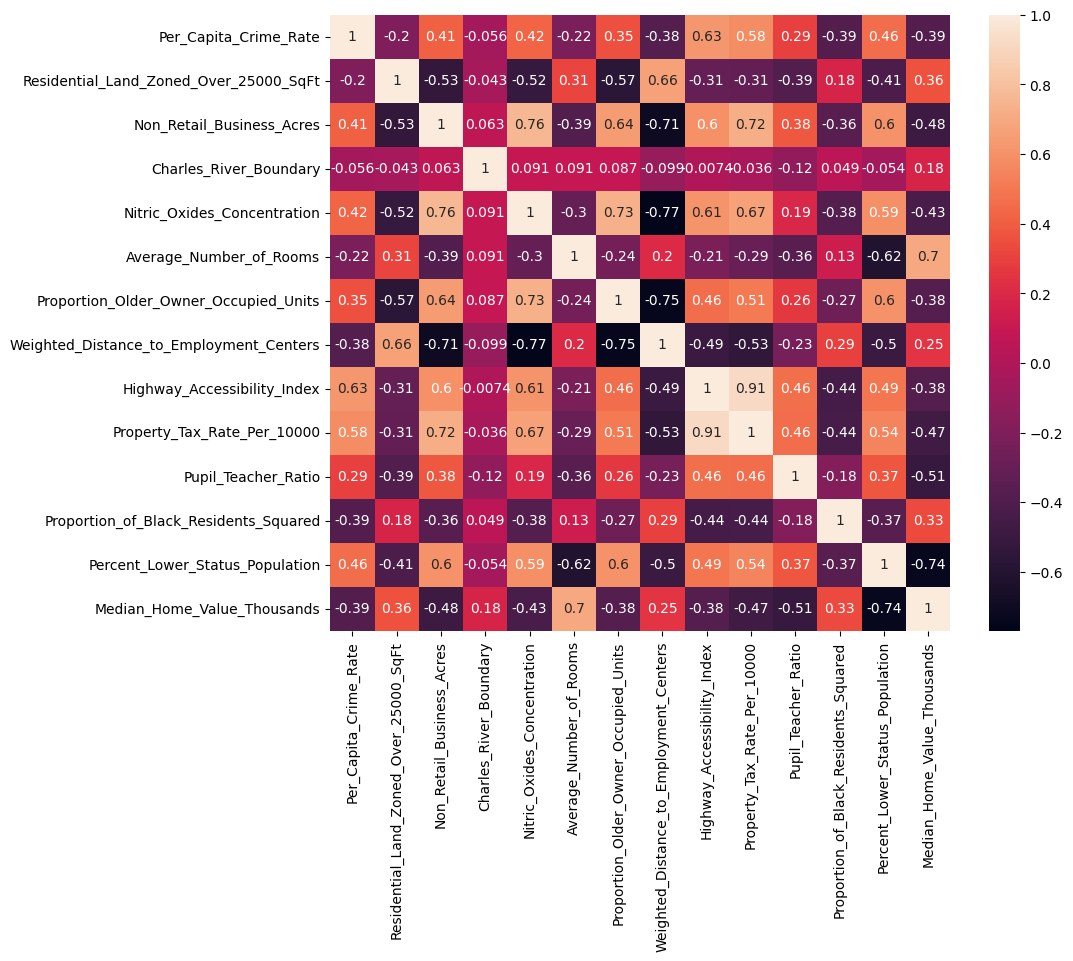

In [6]:
# Understanding the correlation between the data.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(house_price_dataset.corr(), annot=True, ax=ax)
plt.show()

3. data summary

In [19]:
# Check the shape of the dataset
print("-" * 50)
print("Shape of dataset:", house_price_dataset.shape)

# Check the data types and for missing values
print("-" * 50)
print(house_price_dataset.info())

# Check for any missing values
print("-" * 50)
print("Missing values:\n", house_price_dataset.isnull().sum())
print("-" * 50)

# Statistical measures of the dataset
house_price_dataset.describe()

--------------------------------------------------
Shape of dataset: (506, 14)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Per_Capita_Crime_Rate                    506 non-null    float64
 1   Residential_Land_Zoned_Over_25000_SqFt   506 non-null    float64
 2   Non_Retail_Business_Acres                506 non-null    float64
 3   Charles_River_Boundary                   506 non-null    float64
 4   Nitric_Oxides_Concentration              506 non-null    float64
 5   Average_Number_of_Rooms                  506 non-null    float64
 6   Proportion_Older_Owner_Occupied_Units    506 non-null    float64
 7   Weighted_Distance_to_Employment_Centers  506 non-null    float64
 8   Highway_Accessibility_Index              506 non-null    flo

,Per_Capita_Crime_Rate,Residential_Land_Zoned_Over_25000_SqFt,Non_Retail_Business_Acres,Charles_River_Boundary,Nitric_Oxides_Concentration,Average_Number_of_Rooms,Proportion_Older_Owner_Occupied_Units,Weighted_Distance_to_Employment_Centers,Highway_Accessibility_Index,Property_Tax_Rate_Per_10000,Pupil_Teacher_Ratio,Proportion_of_Black_Residents_Squared,Percent_Lower_Status_Population,Median_Home_Value_Thousands
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.720187e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,22.532806
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,9.960317e-01,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,9.197104
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.863541e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.658269e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.054663e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.744178e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,25.000000
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.540533e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,50.000000


- As we can notice that we have 5 null values in the average_Number_of_rooms column. We will handle them in the preprocessing phase.

***Data Preprocessing***

1. Apply Standard Scaler to the features

In [8]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

cols = house_price_dataset.columns.drop("Median_Home_Value_Thousands")

house_price_dataset[cols] = scaler.fit_transform(house_price_dataset[cols])
house_price_dataset

,Per_Capita_Crime_Rate,Residential_Land_Zoned_Over_25000_SqFt,Non_Retail_Business_Acres,Charles_River_Boundary,Nitric_Oxides_Concentration,Average_Number_of_Rooms,Proportion_Older_Owner_Occupied_Units,Weighted_Distance_to_Employment_Centers,Highway_Accessibility_Index,Property_Tax_Rate_Per_10000,Pupil_Teacher_Ratio,Proportion_of_Black_Residents_Squared,Percent_Lower_Status_Population,Median_Home_Value_Thousands
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.412351,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.193874,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.277743,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.012451,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.223834,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.437887,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.233147,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.981240,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.723041,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


2. fill the missing values by the mean of the column

In [14]:
house_price_dataset["Average_Number_of_Rooms"]= house_price_dataset["Average_Number_of_Rooms"].replace(to_replace=np.nan, value = house_price_dataset["Average_Number_of_Rooms"].mean())
print("Missing values:\n", house_price_dataset["Average_Number_of_Rooms"].isnull().sum())

Missing values:
 0


***Split the data into training and testing sets***

In [10]:
X = house_price_dataset.drop("Median_Home_Value_Thousands",axis=1)
y = house_price_dataset['Median_Home_Value_Thousands']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


***Training our Xgboost model***

In [43]:
# load the Xgboost regressor model
xgboost = XGBRegressor()

In [41]:
xgboost.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

***Model Evaluation***

In [44]:
# accuracy of predicting training data
training_data_prediction = xgboost.predict(X_train)

NotFittedError: need to call fit or load_model beforehand

In [45]:
#calculating r square
r_square = metrics.r2_score(y_train, training_data_prediction)


# Mean Absolute Error
MAE = metrics.mean_absolute_error(y_train, training_data_prediction)


print(f"R squared Error = {r_square}")
print(f"Mean Absolute Error = {MAE}")

NameError: name 'training_data_prediction' is not defined

In [ ]:
# accuracy of predicting test data
test_data_prediction = xgboost.predict(X_test)

In [ ]:
#calculating r square
r_square = metrics.r2_score(y_test, test_data_prediction)


# Mean Absolute Error
MAE = metrics.mean_absolute_error(y_test, test_data_prediction)


print(f"R squared Error = {r_square}")
print(f"Mean Absolute Error = {MAE}")